In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time

In [3]:
data=pd.read_csv("wdbc.data")

In [4]:
data.head()

,842302,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,...,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [5]:
y=data.M
drop_cols=["842302","M"]
x=data.drop(drop_cols,axis=1)

benign tumors 357
malignant tumors 211


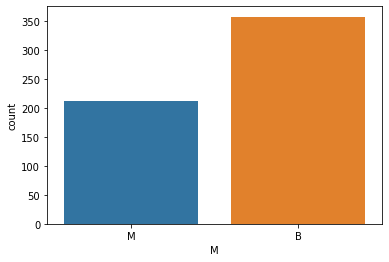

In [6]:
ax=sns.countplot(y,label="count")
B,M=y.value_counts()
print("benign tumors",B)
print("malignant tumors",M)

In [7]:
y.describe()

count     568
unique      2
top         B
freq      357
Name: M, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

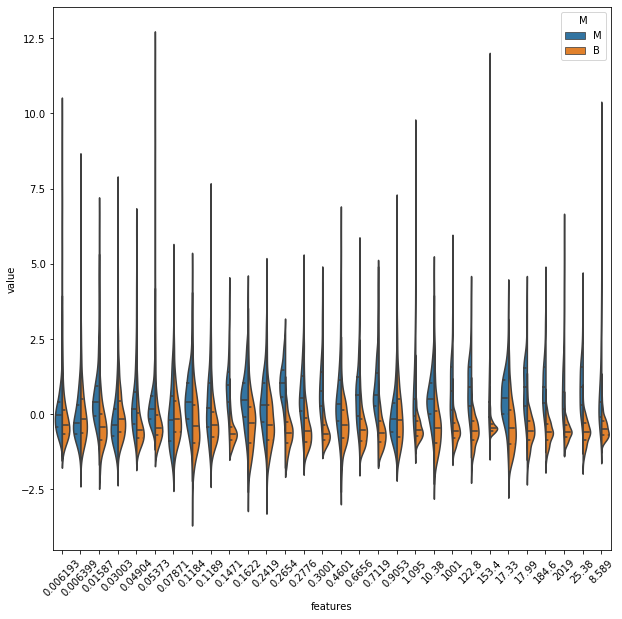

In [8]:
data_std=(x-x.mean())/x.std()
data=pd.concat([y,data_std],axis=1)
data=pd.melt(data,id_vars="M",var_name="features",value_name="value")
plt.figure(figsize=(10,10))
sns.violinplot(x="features",y="value",hue="M",data=data,split=True,inner="quart")
plt.xticks(rotation=45)

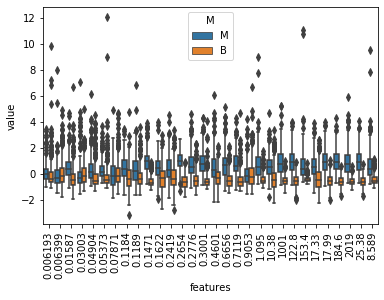

In [9]:
sns.boxplot(x="features",y="value",hue="M",data=data)
plt.xticks(rotation=90);

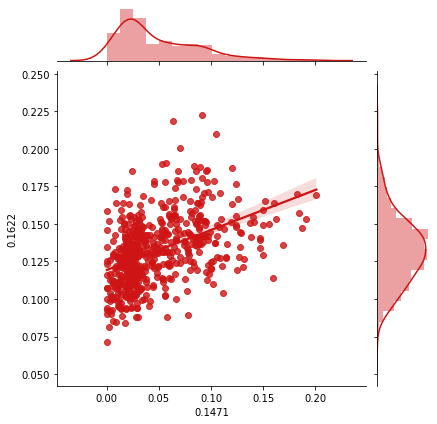

In [10]:
sns.jointplot(x.loc[:,"0.1471"],x.loc[:,"0.1622"],kind="regg",color="#ce1414")

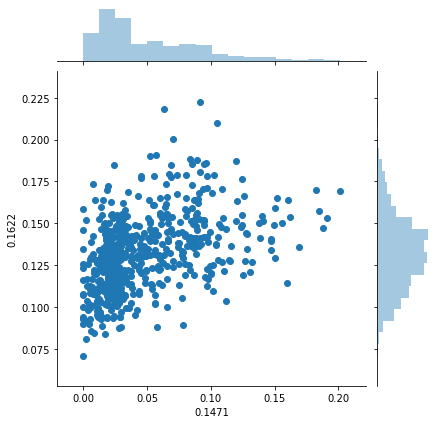

In [11]:
sns.jointplot(x.loc[:,"0.1471"],x.loc[:,"0.1622"])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

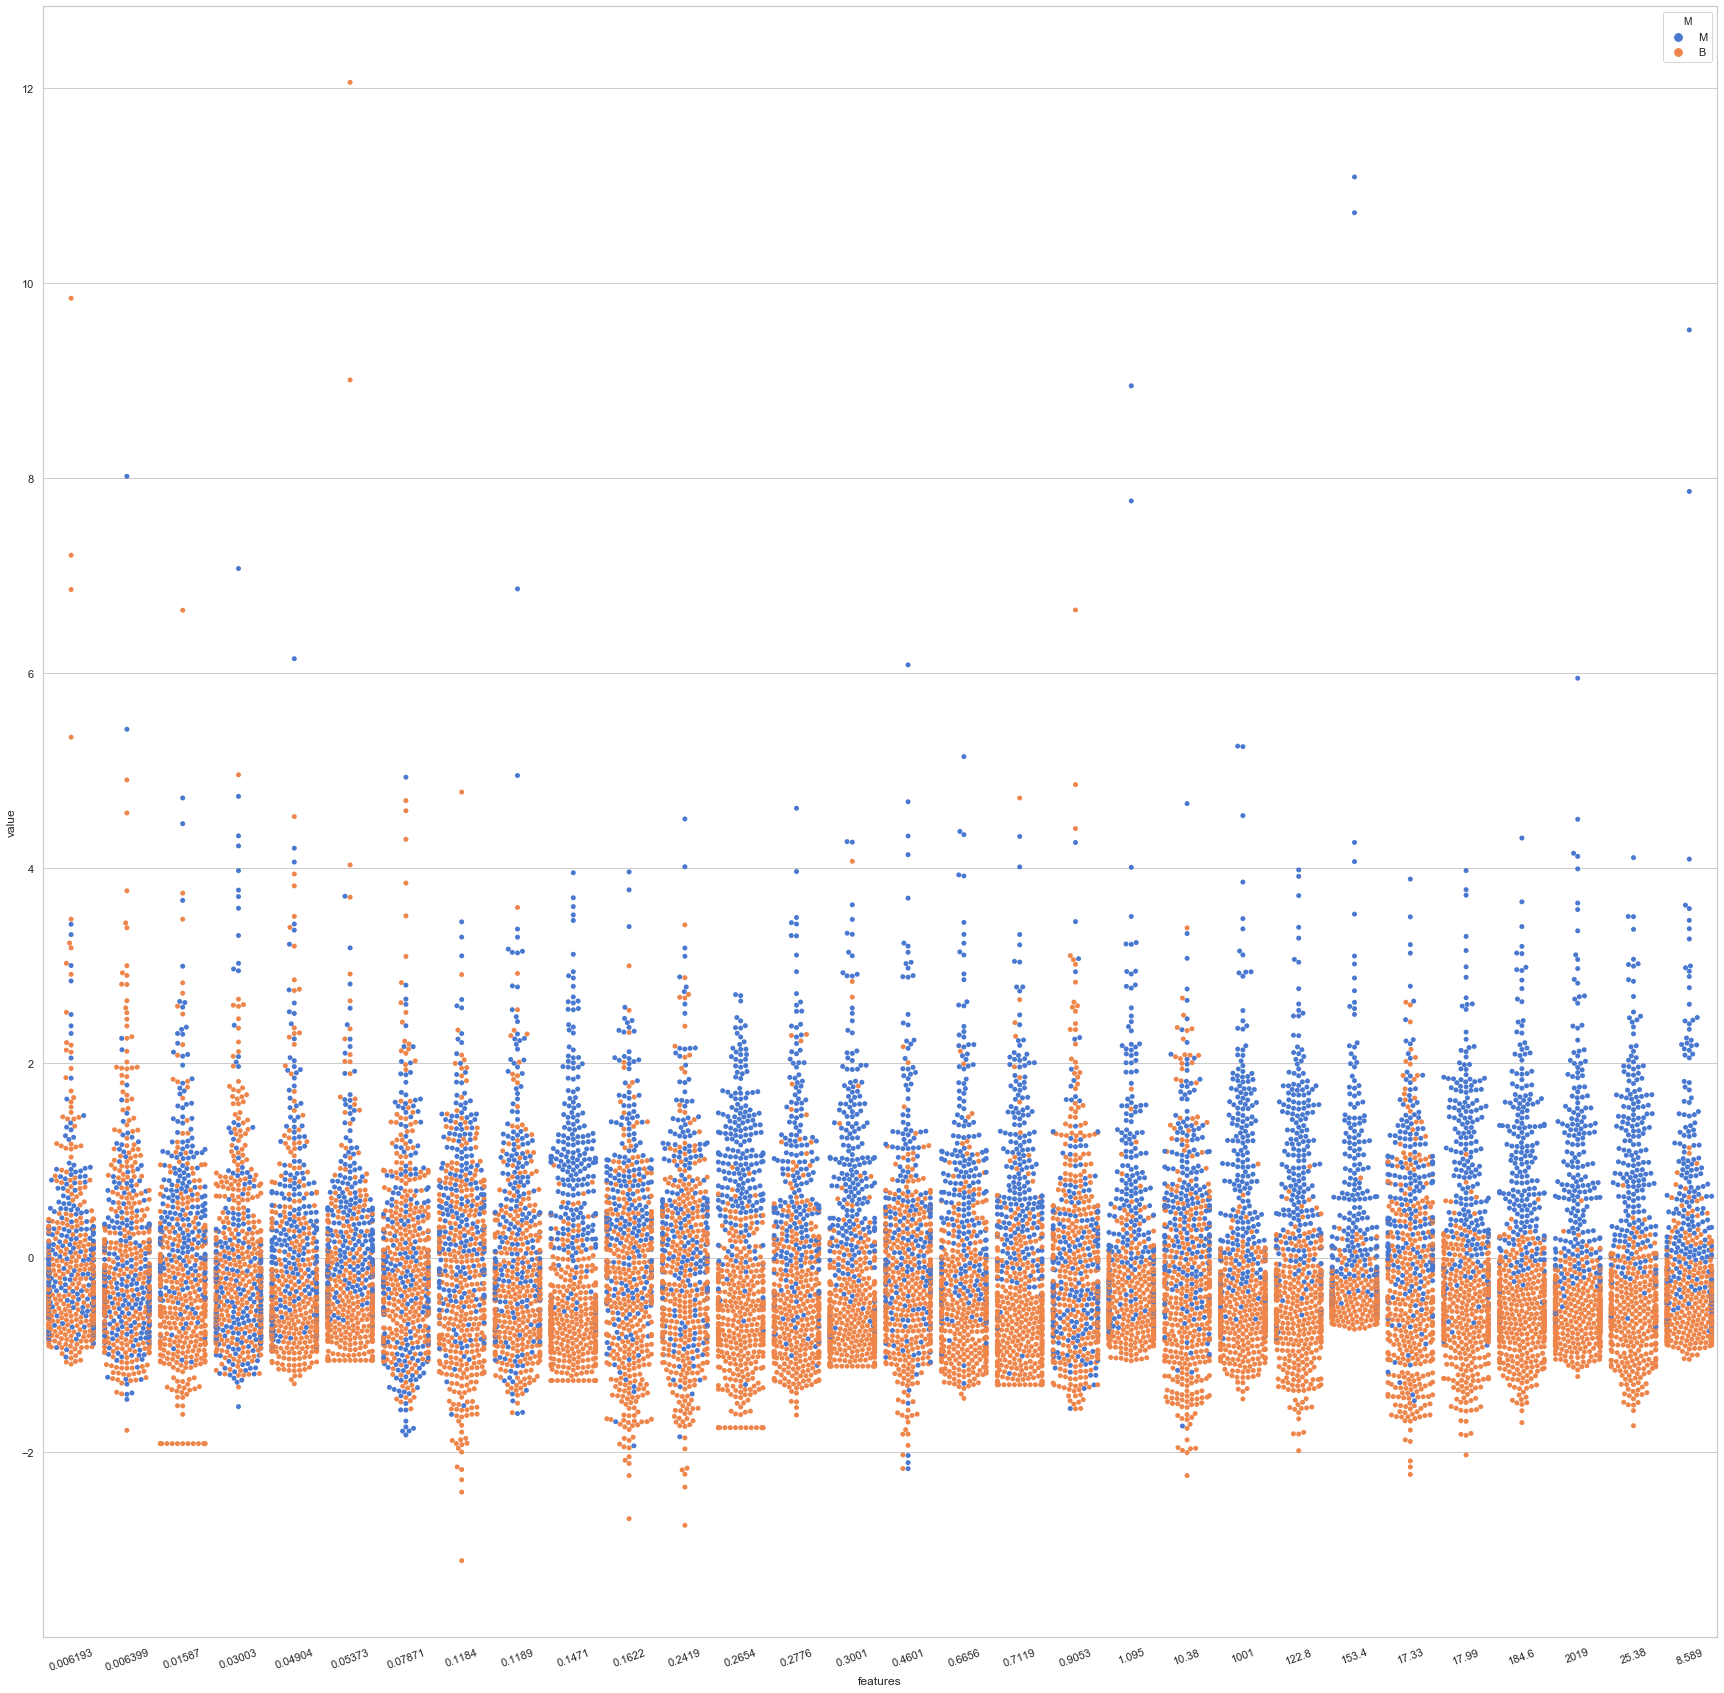

In [12]:
sns.set(style="whitegrid",palette="muted")
plt.figure(figsize=(30,30))
sns.swarmplot(x="features",y="value",hue="M",data=data)
plt.xticks(rotation=20)

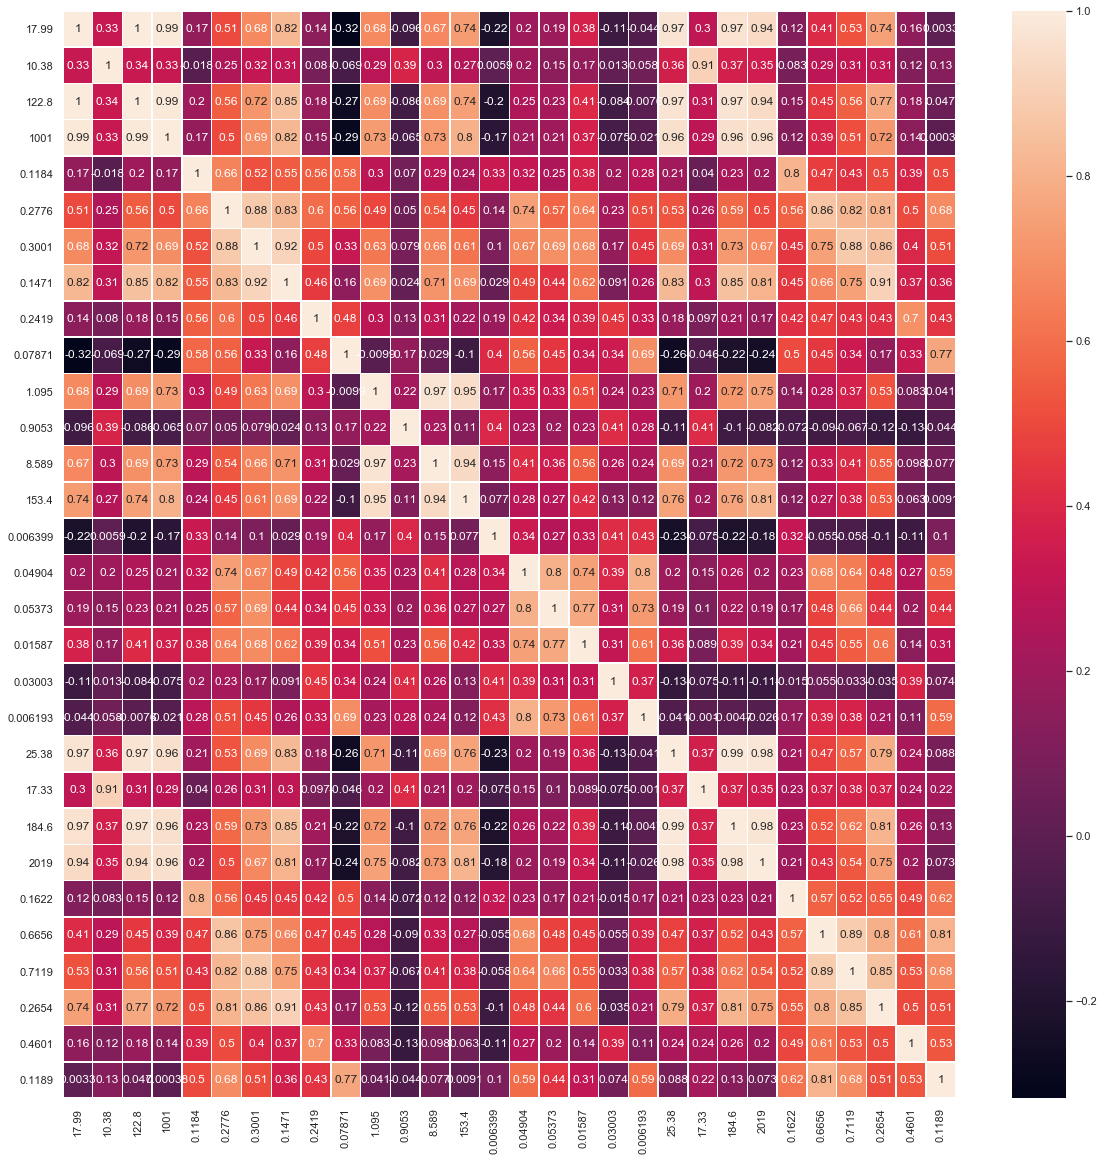

In [13]:
plt.figure(figsize=(20,20))
sns.heatmap(x.corr(),annot=True,linewidth=0.5)
plt.show()

In [24]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

In [23]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=69)

In [28]:
clf_1=xgb.XGBClassifier(random_state=69)
clf_1=clf_1.fit(x_train,y_train)

accuracy score: 0.9707602339181286


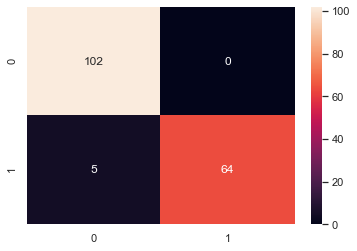

In [29]:
print("accuracy score:",accuracy_score(y_test,clf_1.predict(x_test)))
cm=confusion_matrix(y_test,clf_1.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

In [30]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [31]:
select_feature=SelectKBest(chi2,k=10).fit(x_train,y_train)
print("score list:",select_feature.scores_)
print("Feature list",x_train.columns)

score list: [1.76628334e+02 7.67372491e+01 1.34065378e+03 3.63355110e+04
 9.93668288e-02 3.79160749e+00 1.36148778e+01 7.36581033e+00
 2.01793722e-01 1.52172938e-06 2.52900912e+01 2.81962215e-01
 1.85567998e+02 6.42677362e+03 9.50046091e-04 4.82470820e-01
 6.86630978e-01 2.41485353e-01 1.21813219e-04 9.03656230e-03
 3.21687574e+02 1.38503456e+02 2.41347516e+03 7.52542497e+04
 2.22351425e-01 1.28416544e+01 2.60076329e+01 9.04356341e+00
 8.24713805e-01 1.63177141e-01]
Feature list Index(['17.99', '10.38', '122.8', '1001', '0.1184', '0.2776', '0.3001',
       '0.1471', '0.2419', '0.07871', '1.095', '0.9053', '8.589', '153.4',
       '0.006399', '0.04904', '0.05373', '0.01587', '0.03003', '0.006193',
       '25.38', '17.33', '184.6', '2019', '0.1622', '0.6656', '0.7119',
       '0.2654', '0.4601', '0.1189'],
      dtype='object')


In [33]:
x_train_2=select_feature.transform(x_train)
x_test_2=select_feature.transform(x_test)

accuracy is: 0.935672514619883


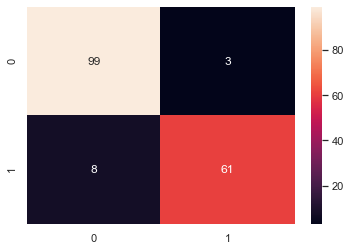

In [34]:
clf_2=xgb.XGBClassifier().fit(x_train_2,y_train)
print("accuracy is:",accuracy_score(y_test,clf_2.predict(x_test_2)))
cm_2=confusion_matrix(y_test,clf_2.predict(x_test_2))
sns.heatmap(cm_2,annot=True,fmt="d")

In [39]:
from sklearn.feature_selection import RFECV
clf_3=xgb.XGBClassifier()
rfecv=RFECV(estimator=clf_3,step=1,cv=5,scoring="accuracy",n_jobs=-1).fit(x_train,y_train)
print("optimal no. of features",rfecv.n_features_)
print("best features",x_train.columns[rfecv.support_])

optimal no. of features 11
best features Index(['17.99', '10.38', '0.2776', '0.3001', '0.1471', '0.01587', '25.38',
       '17.33', '184.6', '2019', '0.2654'],
      dtype='object')


In [40]:
print("accuracy is:",accuracy_score(y_test,rfecv.predict(x_test)))

accuracy is: 0.9707602339181286


[Text(0, 0.5, 'cv scores'), Text(0.5, 0, 'no. of features')]

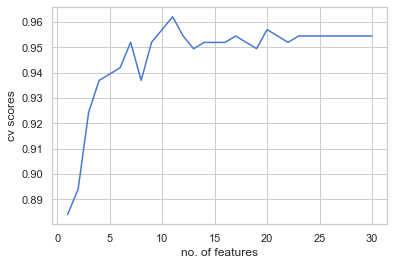

In [41]:
num_features=[i for i in range(1,len(rfecv.grid_scores_)+1)]
cv_scores=rfecv.grid_scores_
ax=sns.lineplot(x=num_features,y=cv_scores)
ax.set(xlabel="no. of features",ylabel="cv scores")

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=69)
x_train_norm=(x_train-x_train.mean())/(x_train.max()-x_train.min())
x_test_norm=(x_test-x_test.mean())/(x_test.max()-x_test.min())

Text(0, 0.5, 'cummulative explained variance')

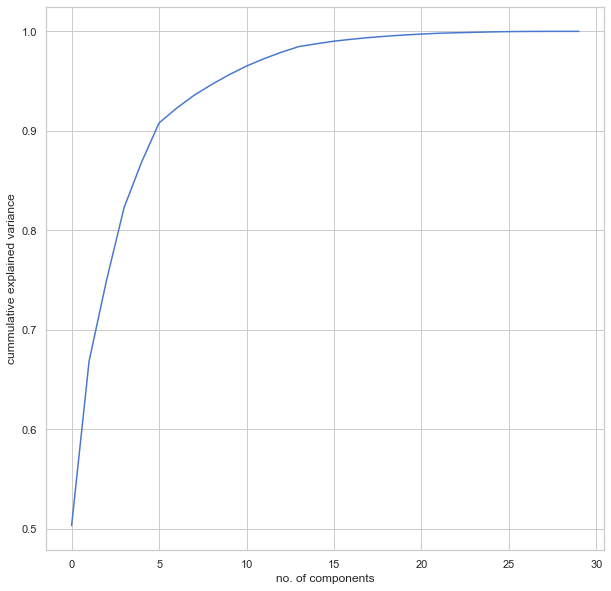

In [44]:
from sklearn.decomposition import PCA
pca=PCA()
pca.fit(x_train_norm)
plt.figure(1,figsize=(10,10))
sns.lineplot(data=np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("no. of components")
plt.ylabel("cummulative explained variance")